#### Project Type: EDA
### Project Number: 0011
## Project Title: СберМаркет

----

  
# **STAGE 5. EXPLORATORY DATA ANALYSIS**

### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh') 

### Import Data

---

In [2]:
# Путь к данным
data_path = r'D:/Data_Science_Project/2. Exploratory Data Analysis/[0011] Project 3 - СберМаркет/'

# data_path = r'/media/ruslan/Data/Data_Science_Project/2. Exploratory Data Analysis/[0011] Project 3 - СберМаркет/'

In [3]:
# Загрузка набора данных orders
hassle_free_orders = pd.read_feather(data_path + '/hassle_free_orders.file')

# Проверка результата 
hassle_free_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332614 entries, 0 to 332613
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  332614 non-null  int64         
 1   user_id             332614 non-null  int64         
 2   total_cost          332614 non-null  float64       
 3   cost                332614 non-null  float64       
 4   item_total          332614 non-null  int64         
 5   promo_total         332614 non-null  float64       
 6   total_weight        332614 non-null  int64         
 7   total_quantity      332614 non-null  int64         
 8   state               332614 non-null  category      
 9   shipped_at          332614 non-null  datetime64[ns]
 10  created_at          332614 non-null  datetime64[ns]
 11  ship_address_id     332614 non-null  int64         
 12  store_id            332614 non-null  int64         
 13  delivery_window_id  332614 no

In [4]:
# Загрузка набора данных orders
problematic_orders = pd.read_feather(data_path + '/problematic_orders.file')

# Проверка результата 
problematic_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835261 entries, 0 to 835260
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   order_id  835261 non-null  int64   
 1   item_id   835261 non-null  int64   
 2   state     835261 non-null  category
dtypes: category(1), int64(2)
memory usage: 13.5 MB


 Разделим наборs по типам переменных
 - Количественные: **hassle_free_orders_num**   
 - Категориальные: **hassle_free_orders_cat**

In [5]:
hassle_free_orders.columns.to_list()

['id',
 'user_id',
 'total_cost',
 'cost',
 'item_total',
 'promo_total',
 'total_weight',
 'total_quantity',
 'state',
 'shipped_at',
 'created_at',
 'ship_address_id',
 'store_id',
 'delivery_window_id',
 'starts_at',
 'ends_at',
 'time_zone',
 'city',
 'retailer_id',
 'lat',
 'lon',
 'elevator',
 'floor']

In [6]:
hassle_free_orders_num = hassle_free_orders[['id',
                                     'user_id',
                                     'total_cost',
                                     'cost',
                                     'item_total',
                                     'promo_total',
                                     'total_weight',
                                     'total_quantity',
                                     'shipped_at',
                                     'created_at',
                                     'ship_address_id',
                                     'store_id',
                                     'delivery_window_id',
                                     'starts_at',
                                     'ends_at',
                                     'city',
                                     'retailer_id',
                                     'lat',
                                     'lon',
                                     'floor'
                                    ]]

hassle_free_orders_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332614 entries, 0 to 332613
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  332614 non-null  int64         
 1   user_id             332614 non-null  int64         
 2   total_cost          332614 non-null  float64       
 3   cost                332614 non-null  float64       
 4   item_total          332614 non-null  int64         
 5   promo_total         332614 non-null  float64       
 6   total_weight        332614 non-null  int64         
 7   total_quantity      332614 non-null  int64         
 8   shipped_at          332614 non-null  datetime64[ns]
 9   created_at          332614 non-null  datetime64[ns]
 10  ship_address_id     332614 non-null  int64         
 11  store_id            332614 non-null  int64         
 12  delivery_window_id  332614 non-null  float64       
 13  starts_at           332614 no

In [7]:
hassle_free_orders_cat = hassle_free_orders[['state',
                                     'time_zone',
                                     'elevator'
                                     ]]
hassle_free_orders_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332614 entries, 0 to 332613
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   state      332614 non-null  category
 1   time_zone  332614 non-null  category
 2   elevator   332614 non-null  category
dtypes: category(3)
memory usage: 975.0 KB


### _Goals and objectives of the analysis_

---

### Анализ проблемы 

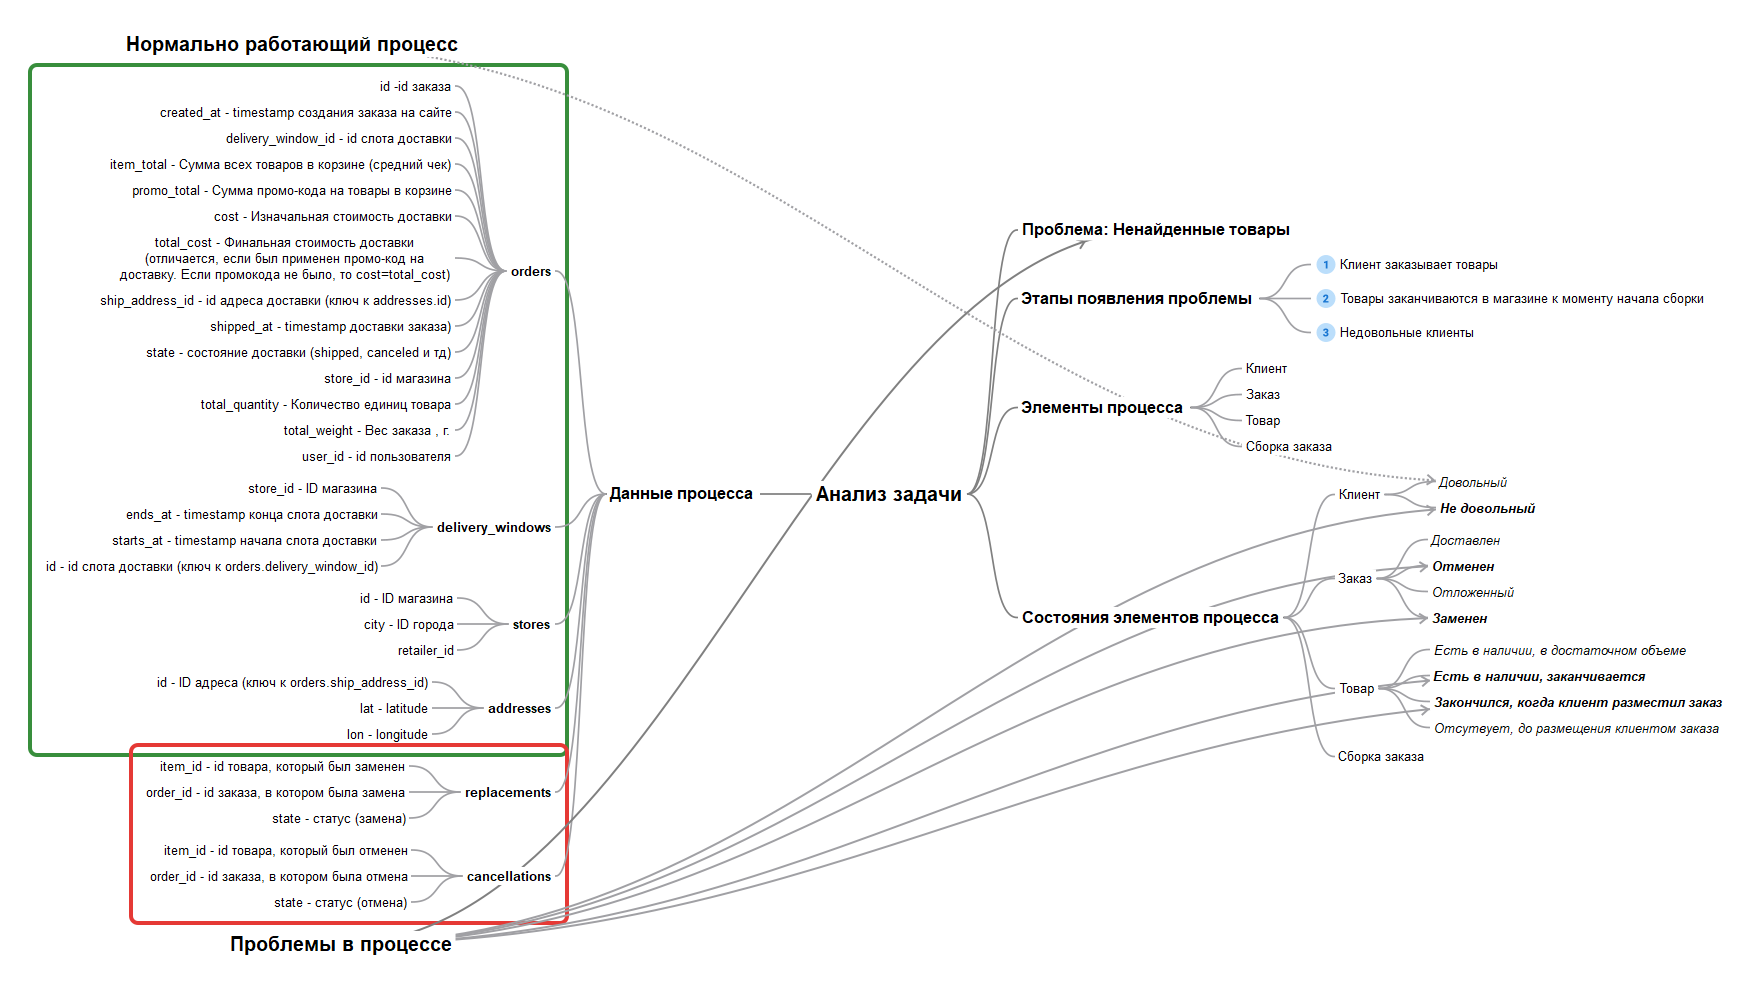

- Набор данных **hassle_free_orders** отражает параметры нормально работающего процесса. 
- Набор данных **problematic_orders** отражает параметры проблем в процессе
- **Задача: Исследовать проблемы в процессе**


## SECTION 5.1 RESEARCH

### _Descriptive Statistics_

---

### hassle_free_orders

In [8]:
# Описательные статистики 
hassle_free_orders_num.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,332614.0,4192338.11,657749.68,557.00,3640250.00,4139097.50,4748857.25,5513202.00
user_id,332614.0,178291.46,131138.17,31.00,85050.00,147414.00,244312.00,682383.00
total_cost,332614.0,189.18,175.35,-298.00,0.00,199.00,299.00,9500.00
cost,332614.0,258.27,172.37,0.00,199.00,299.00,299.00,9500.00
item_total,332614.0,4925.96,5536.46,0.00,2571.25,3879.50,5814.00,480746.00
promo_total,332614.0,-66.50,304.93,-39899.30,0.00,0.00,0.00,0.00
total_weight,332614.0,26962.39,41944.88,0.00,9700.00,18208.50,31985.00,3864000.00
total_quantity,332614.0,44.27,75.22,0.00,18.00,31.00,50.00,7728.00
ship_address_id,332614.0,1392707.25,609944.05,6017.00,859097.25,1338412.00,1893860.25,2669705.00
store_id,332614.0,23.11,29.69,1.00,8.00,11.00,21.00,120.00


In [9]:
# Описательные статистики 
hassle_free_orders_cat.describe().round(2).T

,count,unique,top,freq
state,332614,3,shipped,332595
time_zone,332614,5,Europe/Moscow,314828
elevator,332614,2,absent,196043


### problematic_orders

In [10]:
# Описательные статистики 
problematic_orders.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
order_id,835261.0,4092328.33,618715.09,557.0,3604748.0,3986589.0,4525391.0,5513202.0
item_id,835261.0,14344982.63,6114548.22,5331852.0,9230808.0,13196363.0,18853537.0,28179528.0


In [11]:
# Описательные статистики 
problematic_orders[['state']].describe().round(2).T

,count,unique,top,freq
state,835261,2,canceled,507119


### _Distribution of data_

---

### hassle_free_orders

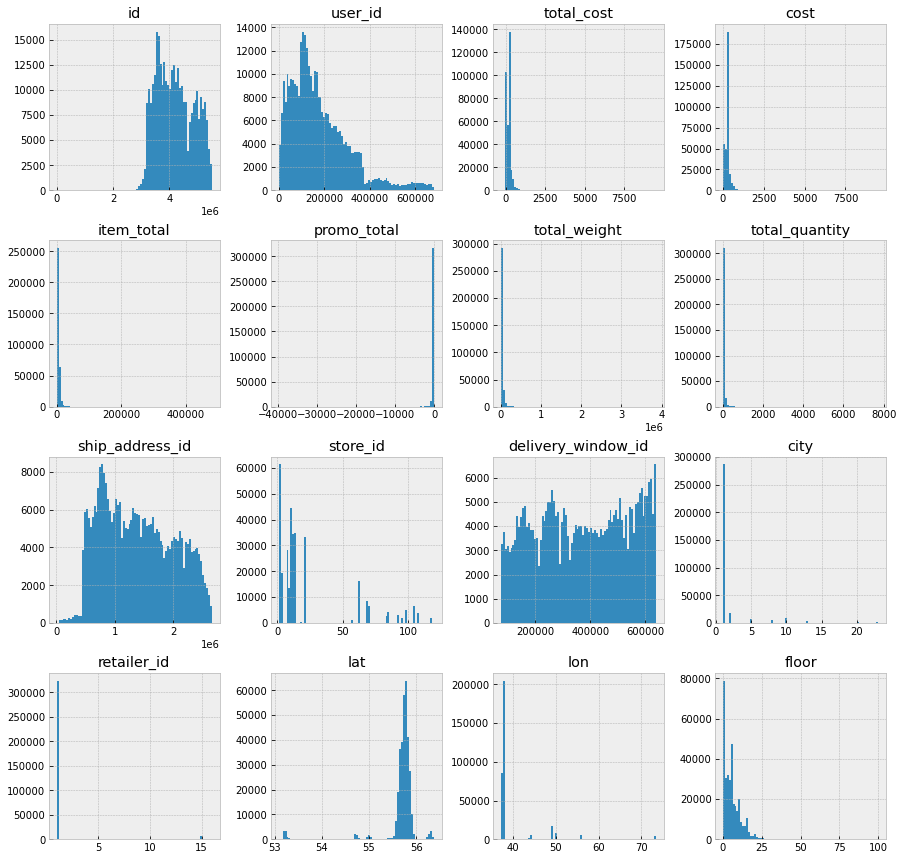

In [12]:
# Гистограмма распределения значений 
hassle_free_orders_num.hist(bins=80, figsize=(15,15))
plt.show()

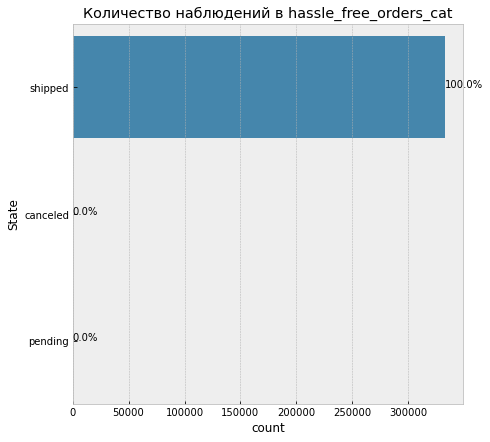

In [13]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=hassle_free_orders_cat.state, order = hassle_free_orders_cat.state.value_counts().index);
ax.set_title('Количество наблюдений в hassle_free_orders_cat');
ax.set(ylabel='State')

total = len(hassle_free_orders_cat['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

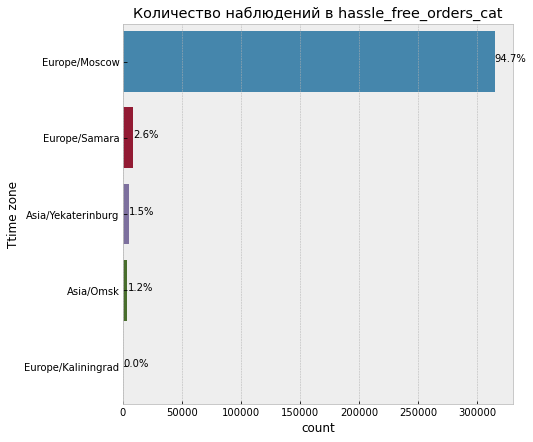

In [14]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=hassle_free_orders_cat.time_zone, order = hassle_free_orders_cat.time_zone.value_counts().index);
ax.set_title('Количество наблюдений в hassle_free_orders_cat');
ax.set(ylabel='Ttime zone')

total = len(hassle_free_orders_cat['time_zone'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

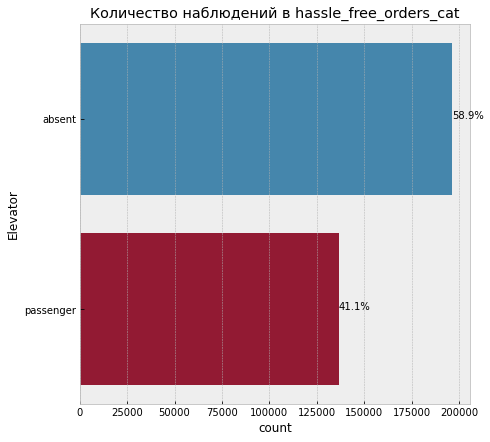

In [15]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=hassle_free_orders_cat.elevator, order = hassle_free_orders_cat.elevator.value_counts().index);
ax.set_title('Количество наблюдений в hassle_free_orders_cat');
ax.set(ylabel='Elevator')

total = len(hassle_free_orders_cat['elevator'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

- В целом анализ гистограмм распределения показывает, что распределение данных в значительной степени отличается от нормального и имеют хвосты.  
- В наборе hassle_free_orders все заказы имеют статус «shipped». 
- 94.7% заказов приходится на европейский часовой пояс, город Москва 


### problematic_orders

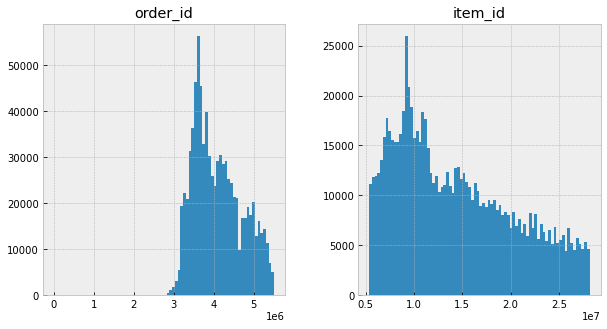

In [16]:
# Гистограмма распределения значений 
problematic_orders.hist(bins=80, figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='item_id', ylabel='order_id'>

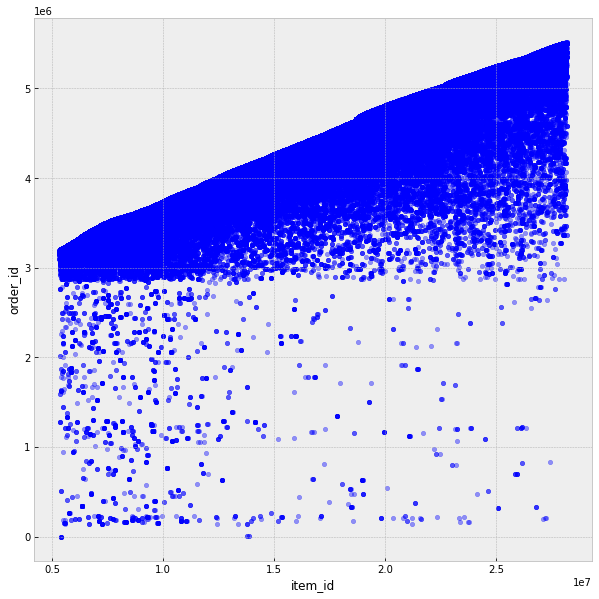

In [17]:
# Гистограмма рассеяния значений 
problematic_orders.plot(kind="scatter", x='item_id', y='order_id', alpha=0.4, figsize=(10,10))

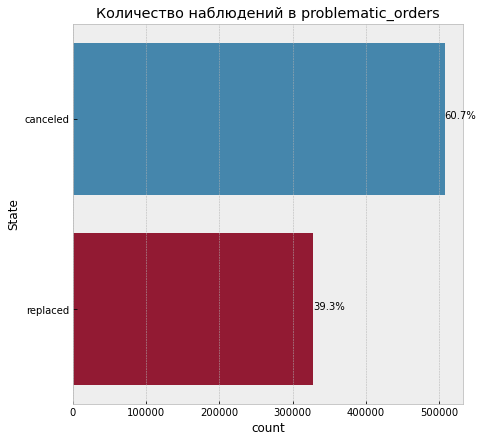

In [18]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=problematic_orders.state, order = problematic_orders.state.value_counts().index);
ax.set_title('Количество наблюдений в problematic_orders');
ax.set(ylabel='State')

total = len(problematic_orders['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

- Распределение данных в значительной степени отличается от нормального и имеют хвосты.  
- Диаграмма рассеянья заказов (order_id) и товаров, которые были отменены / заменены (item_id) показывает, что в целом товары данной категории образуют группу и значительное количество выбросов.  Т.е. если минимизировать нарушения в процессе основной группы – это может повысить качества процесса оставив только относительно редкие события образующие выбросы. 
- 60.7 % проблемный заказов отменяются, 39.3% заменяются. Такое соотношение крайне негативно сказывается на бизнесе.  


### _Outliers detection_

---

### hassle_free_orders

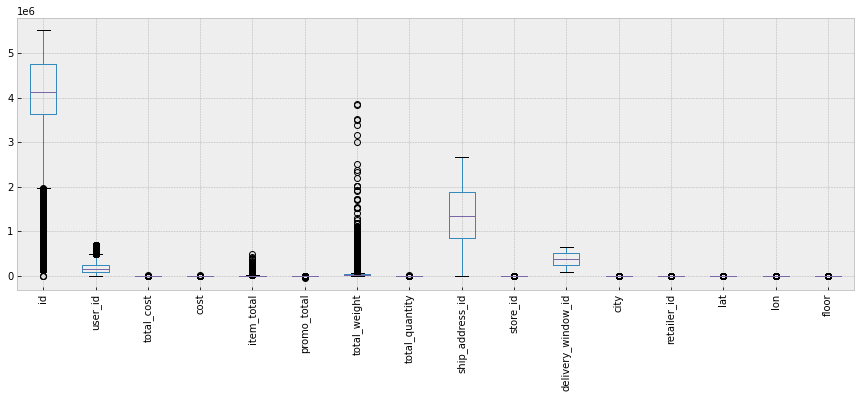

In [19]:
hassle_free_orders_num.boxplot(figsize=(15,5), rot=90)
plt.show()

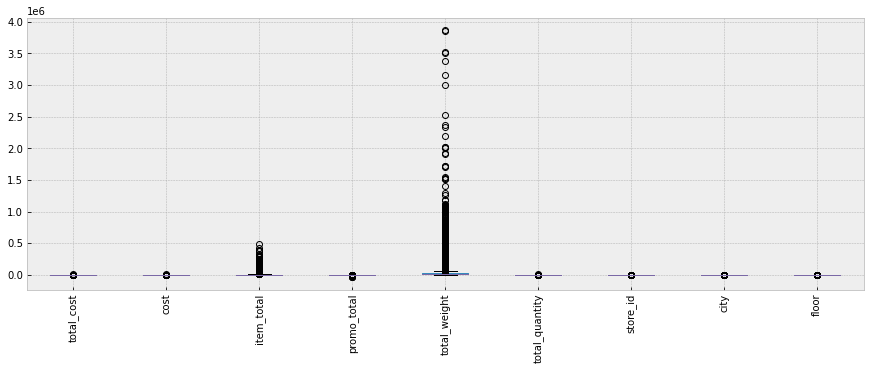

In [20]:
hassle_free_orders_num[[
 'total_cost',
 'cost',
 'item_total',
 'promo_total',
 'total_weight',
 'total_quantity',
 'shipped_at',
 'created_at',
 'store_id',
 'starts_at',
 'ends_at',
 'city',
 'floor']].boxplot(figsize=(15,5), rot=90)
plt.show()

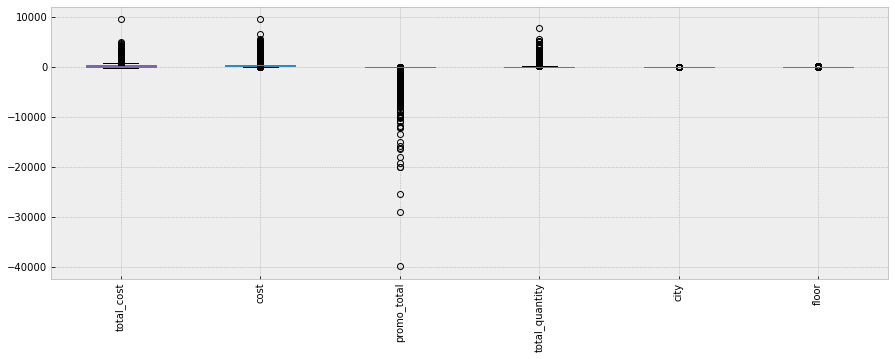

In [21]:
hassle_free_orders_num[[
 'total_cost',
 'cost',
 'promo_total',
 'total_quantity',
 'shipped_at',
 'created_at',
 'starts_at',
 'ends_at',
 'city',
 'floor']].boxplot(figsize=(15,5), rot=90)
plt.show()

 Имеется значительное количество выбросов превышающих интерквантильный размах    

### problematic_orders

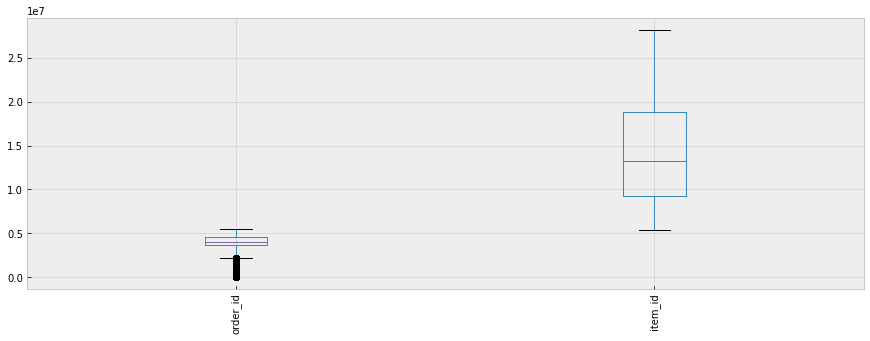

In [22]:
problematic_orders.boxplot(figsize=(15,5), rot=90)
plt.show()

### _Exploring Relationships_

---

<AxesSubplot:xlabel='lon', ylabel='lat'>

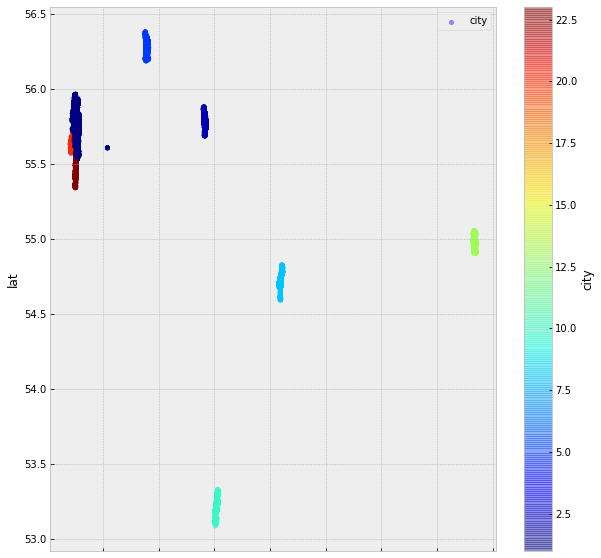

In [23]:
hassle_free_orders_num.plot(kind="scatter", x='lon', y='lat', alpha=0.4, figsize=(10,10), c='city', cmap=plt.get_cmap('jet'), colorbar=True, label='city')

Анализ географических данных показывает, что имеется 7 областей в которых осуществляются продажи при этом анализ временных зон показывает, что продажи ведутся в 5 городах(Москва, Самара, Екатеринбург,  Омск, Калининград). 
Каждый город имеет разный объем продаж, что выделено соответствующим цветом. 


<AxesSubplot:xlabel='lon', ylabel='lat'>

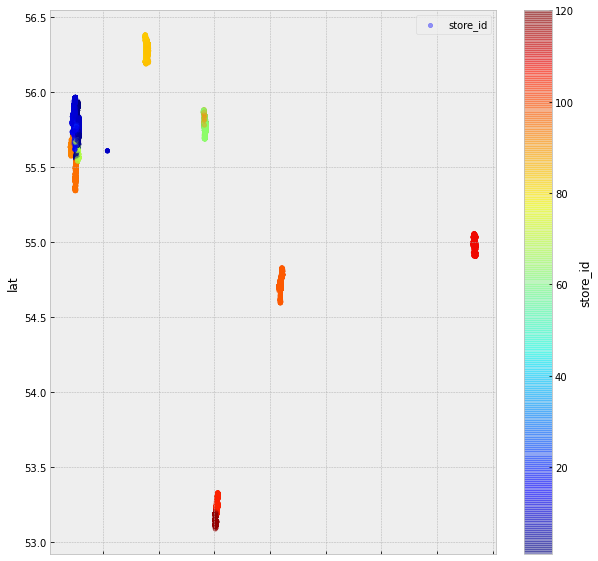

In [24]:
hassle_free_orders_num.plot(kind="scatter", x='lon', y='lat', alpha=0.4, figsize=(10,10), c='store_id', cmap=plt.get_cmap('jet'), colorbar=True, label='store_id')

Продажи в меньших областях продажи происходят в магазинах с одним и тем же   store_id, что позволяет из отнести к Самаре, Екатеринбургу, Омску Калининграду. В крупной области продажи   происходят в разных магазинах, что позволяет предположить, что это Москва. 

<AxesSubplot:xlabel='lon', ylabel='lat'>

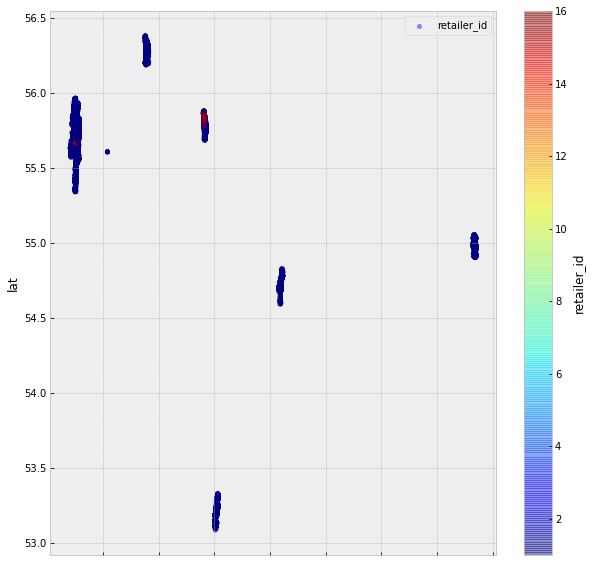

In [25]:
hassle_free_orders_num.plot(kind="scatter", x='lon', y='lat', alpha=0.4, figsize=(10,10), c='retailer_id', cmap=plt.get_cmap('jet'), colorbar=True, label='retailer_id')

Анализ географических данных по retailer_id основная часть магазинов принадлежит одному ретейлеру. 

Выполним слияние наборов problematic_orders и hassle_free_orders для более детального анализа взаимосвязей между предикторами. 

In [26]:
relationships_df = pd.merge(problematic_orders, hassle_free_orders, left_on="order_id", right_on="id" )
relationships_df.tail()

,order_id,item_id,state_x,id,user_id,total_cost,cost,item_total,promo_total,total_weight,...,delivery_window_id,starts_at,ends_at,time_zone,city,retailer_id,lat,lon,elevator,floor
831655,5510694,28141645,canceled,5510694,681180,98.0,249.0,156,-399.0,2634,...,637044.0,2019-08-04 17:00:00,2019-08-04 19:00:00,Europe/Moscow,1.0,1.0,55.717830,37.734015,passenger,7.0
831656,5511365,28129222,canceled,5511365,681464,0.0,299.0,2183,0.0,1400,...,637254.0,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow,1.0,1.0,55.723660,37.456218,absent,3.0
831657,5271730,28144890,canceled,5271730,179748,178.0,219.0,5718,0.0,31050,...,637253.0,2019-08-04 19:00:00,2019-08-04 21:00:00,Europe/Moscow,1.0,1.0,55.684514,37.560865,absent,3.0
831658,5271730,28138493,canceled,5271730,179748,178.0,219.0,5718,0.0,31050,...,637253.0,2019-08-04 19:00:00,2019-08-04 21:00:00,Europe/Moscow,1.0,1.0,55.684514,37.560865,absent,3.0
831659,5316955,28151512,canceled,5316955,165630,449.0,449.0,2468,0.0,55524,...,637047.0,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow,1.0,1.0,55.678905,37.717162,passenger,10.0


### _Correlation analysis_

---

<AxesSubplot:>

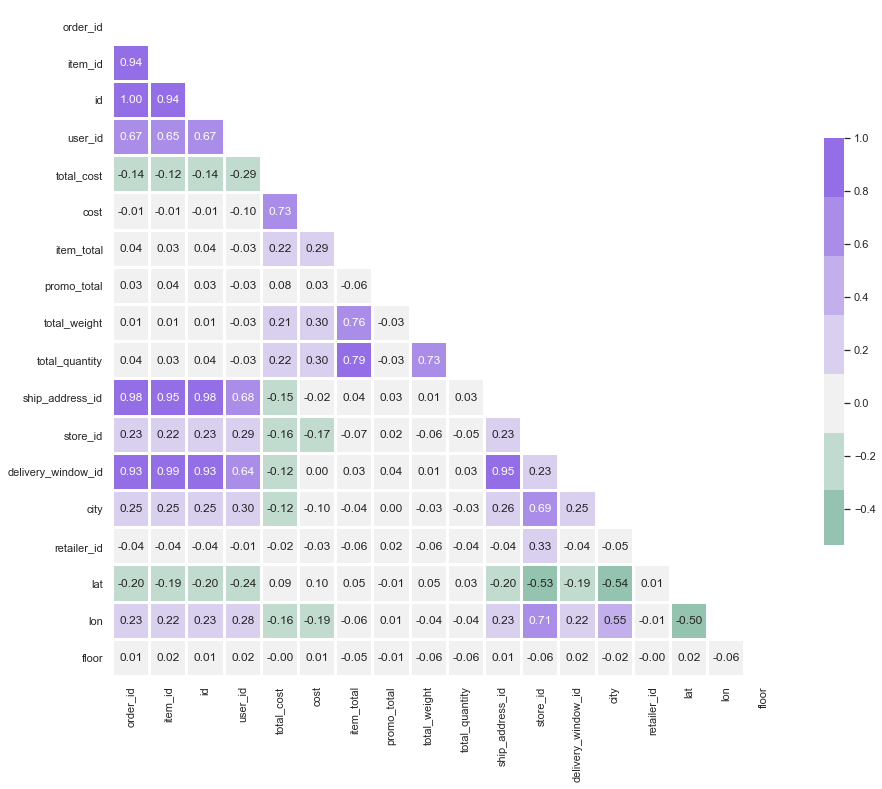

In [27]:
# Постороение диагональной корриляционной матрицы.

sns.set_theme(style="white")
# Compute the correlation matrix
corr = relationships_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .5})

Корреляционный анализ показывает, что между различным id есть сильная линейная связь, так же есть сильная линейная зависимость между весом заказа и его стоимостью. В целом для будущего построения моделей машинного обучения это означает, что от id можно и нужно избавиться для уменьшения размерности данных. 

### _Time Series Analysis_

---

In [28]:
plt.style.use('bmh') 
# sns.set_style("whitegrid")
def trend_analysis(substation):
    # ПОСТРОЕНИЕ СКОЛЬЗЯЩИХ СРЕДНИХ
    
    # 7-ми дневное скользящее среднее 
    data_7d_rol = substation.rolling(window = 7, center = True).mean()

    # 30-ми дневное скользящее среднее
    data_30d_rol = substation.rolling(window = 30, center = True).mean()

    # 365-ми дневное скользящее среднее
    data_365d_rol = substation.rolling(window = 365, center = True).mean()
    
    #ПОСТРОЕНИЕ ГРАФИКОВ СКОЛЬЗЯЩИХ СРЕДНИХ 
    
    fig, ax = plt.subplots(figsize = (18,8))

    # plotting daily data
    ax.plot(substation, marker='*', markersize=2, color='0.6',linestyle='None', label='Daily')

    # Запасной вариант представления
    # ax.plot(novaya_entering_t2, linewidth=2, label='Daily', color='0.6', alpha = 0.5 )

    # plotting 7-day rolling data
    ax.plot(data_7d_rol, linewidth=2, label='7-d Rolling Mean')

    # plotting 30-day rolling data
    ax.plot(data_30d_rol, linewidth=2, label='30-d Rolling Mean')

    # plotting annual rolling data
    ax.plot(data_365d_rol, color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

        
    # Beautification of plot
    # ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Item id')
    ax.set_title('Trends')

In [29]:
# Time series 
import datetime
import statsmodels.api as sm

In [30]:
def autocorr_analysis(substation):
      
    fig, ax = plt.subplots(1, 2, figsize=(18,8))
    plt.suptitle("Autocorrelation", fontsize=18)
    
    sm.graphics.tsa.plot_acf(substation.values.squeeze(), lags=50, ax=ax[0])
    sm.graphics.tsa.plot_pacf(substation.values.squeeze(), lags=50, ax=ax[1])
    plt.show()

In [31]:
def seasonality_analysis(substation, period=180):
    seasonality = sm.tsa.seasonal_decompose(substation, model='additive', period=period).seasonal
    fig, ax = plt.subplots(figsize = (18,8))
    ax.plot(seasonality)   

Text(0.5, 1.0, 'Item id # over Time by order created_at')

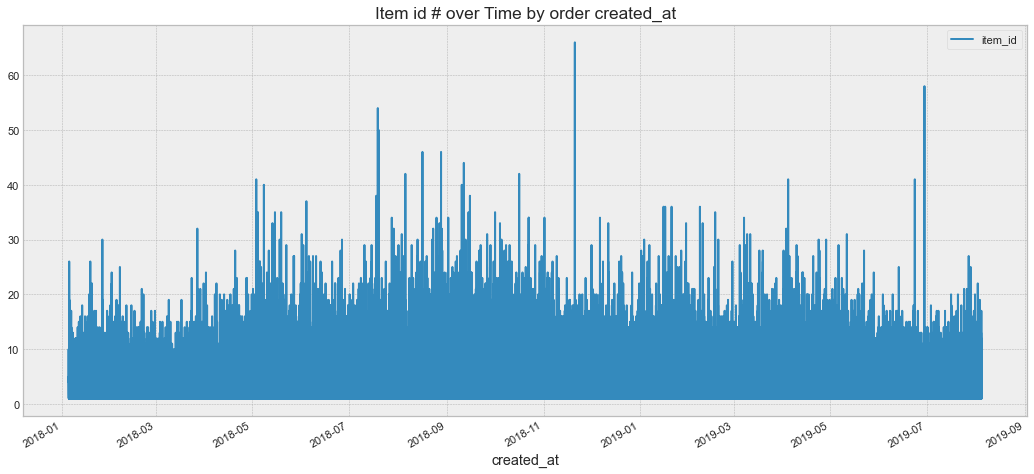

In [32]:
df_graph = relationships_df.groupby('created_at')['item_id'].count().to_frame()
df_graph['item_id'].plot(figsize=(18,8), legend=True)
plt.title('Item id # over Time by order created_at')

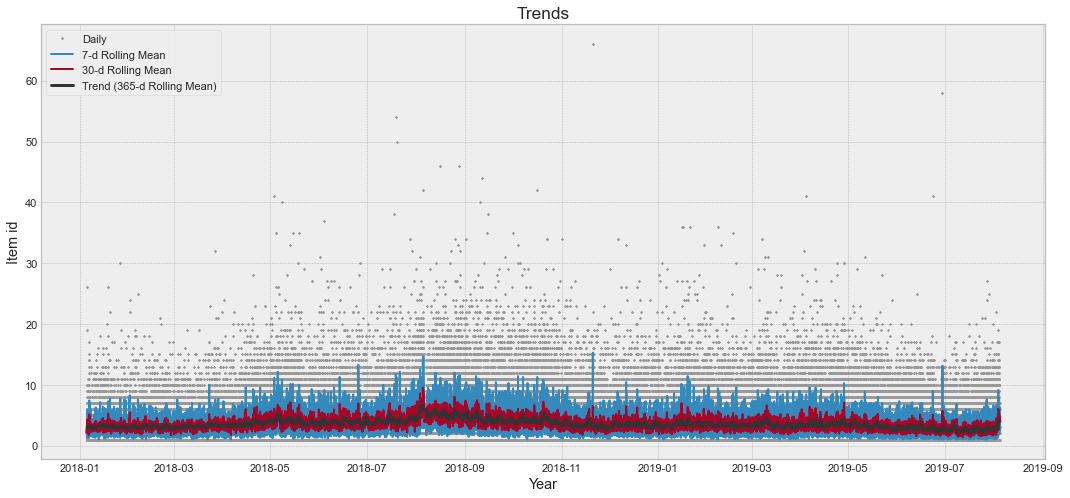

In [33]:
trend_analysis(df_graph['item_id'])

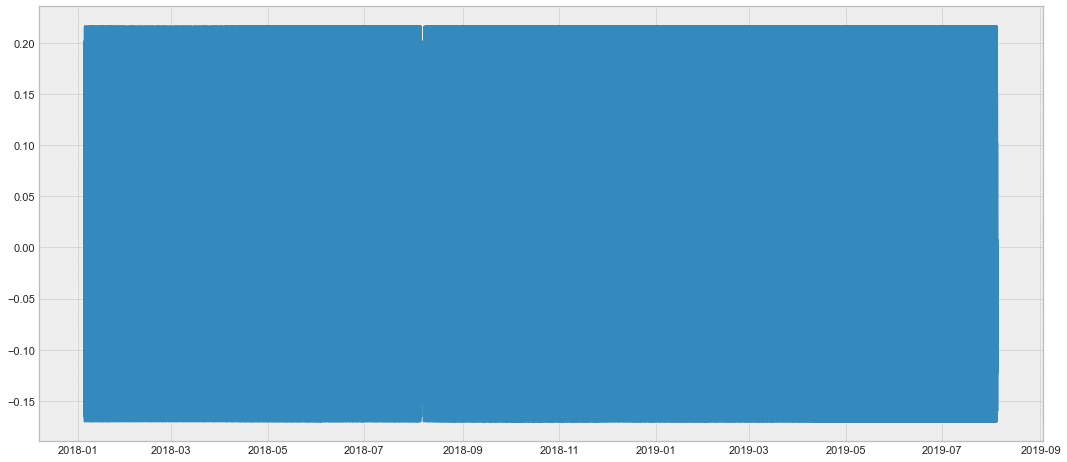

In [34]:
seasonality_analysis(df_graph['item_id'])

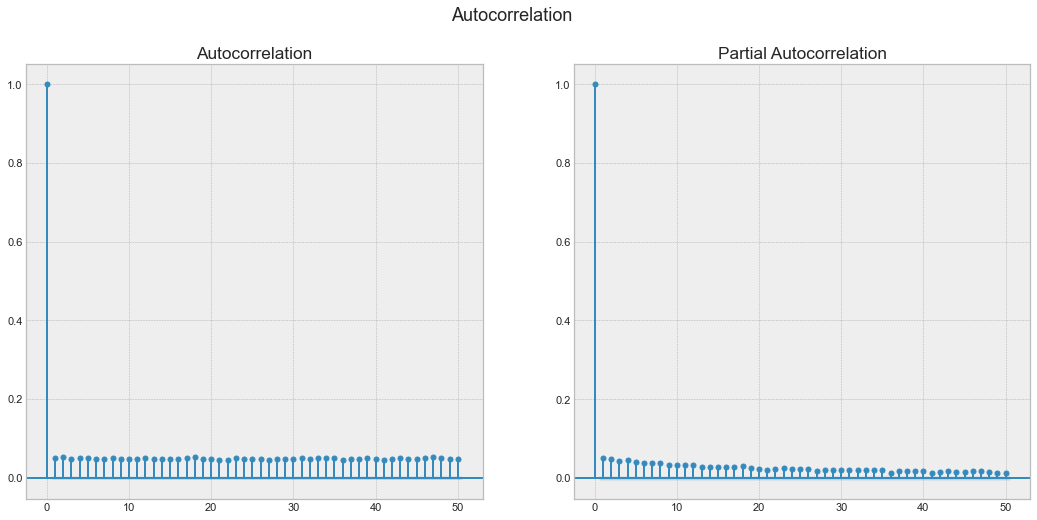

In [35]:
autocorr_analysis(df_graph['item_id'])

Text(0.5, 1.0, 'Item id # over Time by order shipped_at')

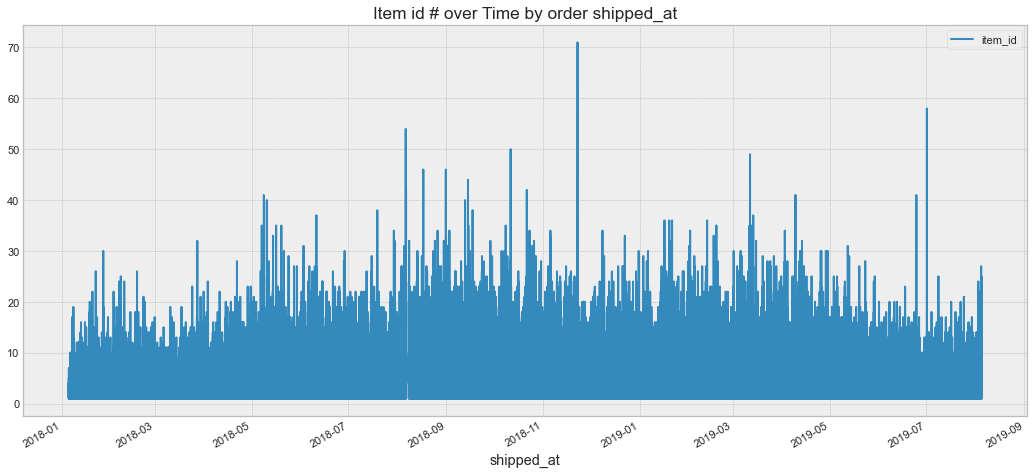

In [36]:
df_graph = relationships_df.groupby('shipped_at')['item_id'].count().to_frame()
df_graph['item_id'].plot(figsize=(18,8), legend=True)
plt.title('Item id # over Time by order shipped_at')

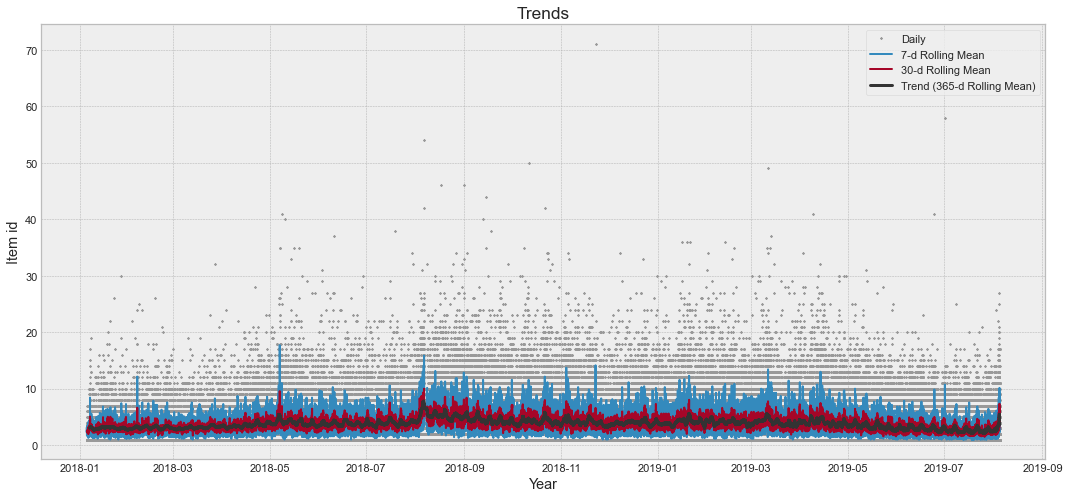

In [37]:
trend_analysis(df_graph['item_id'])

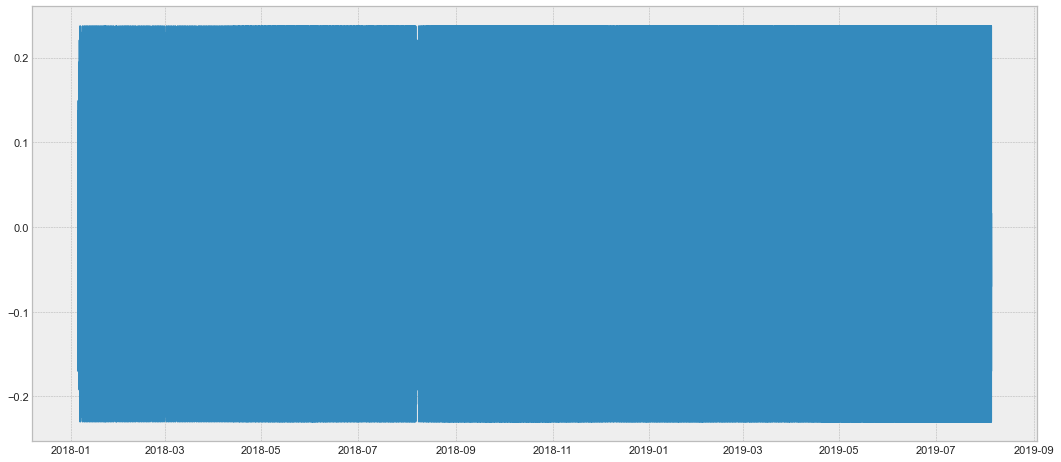

In [38]:
seasonality_analysis(df_graph['item_id'])

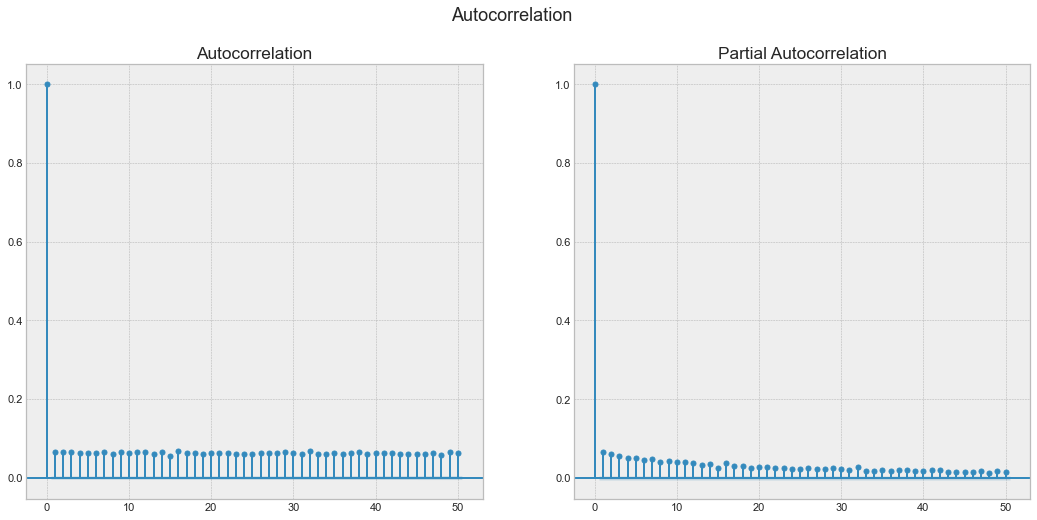

In [39]:
autocorr_analysis(df_graph['item_id'])

Анализ временного ряда item_id ко времени created_at показывает, что тренды в данном временном ряду отсутствуют т.е. он по большому счету стационарен.  
Сезонности за период 180 дней не наблюдается. Автокорреляции нет.  
Аналогичные выводы относятся к ряду item_id ко времени shipped_at. 


Text(0.5, 1.0, 'Item_id # over Time by order ends_at')

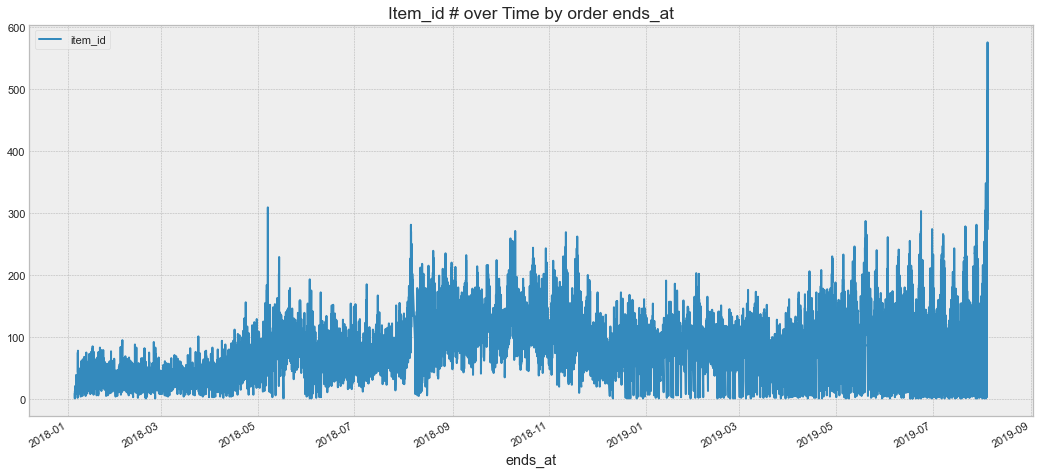

In [40]:
df_graph = relationships_df.groupby('ends_at')['item_id'].count().to_frame()
df_graph['item_id'].plot(figsize=(18,8), legend=True)
plt.title('Item_id # over Time by order ends_at')

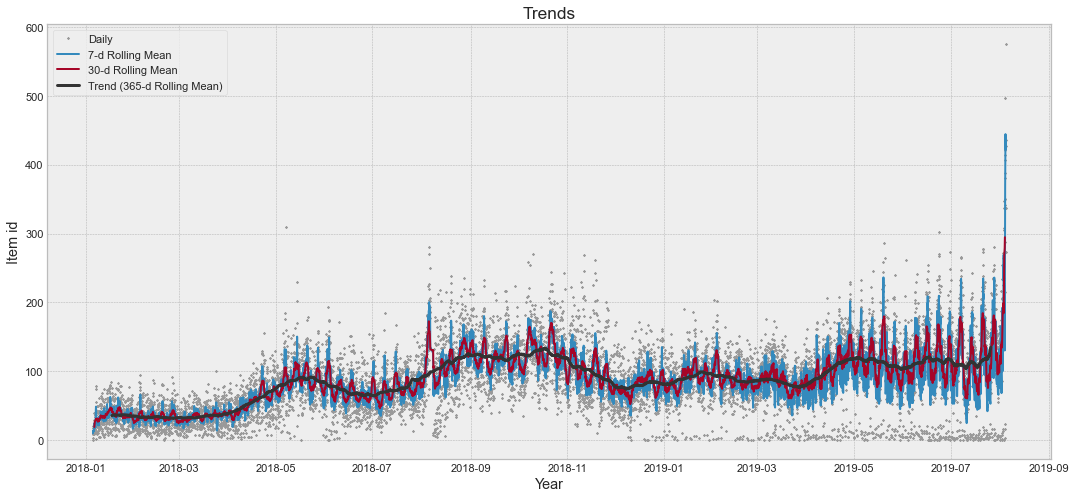

In [41]:
trend_analysis(df_graph['item_id'])

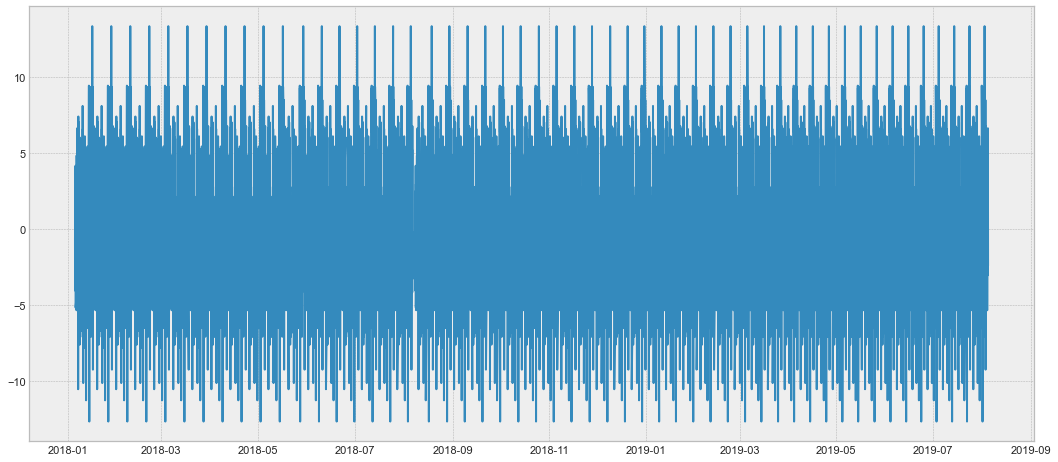

In [42]:
seasonality_analysis(df_graph['item_id'])

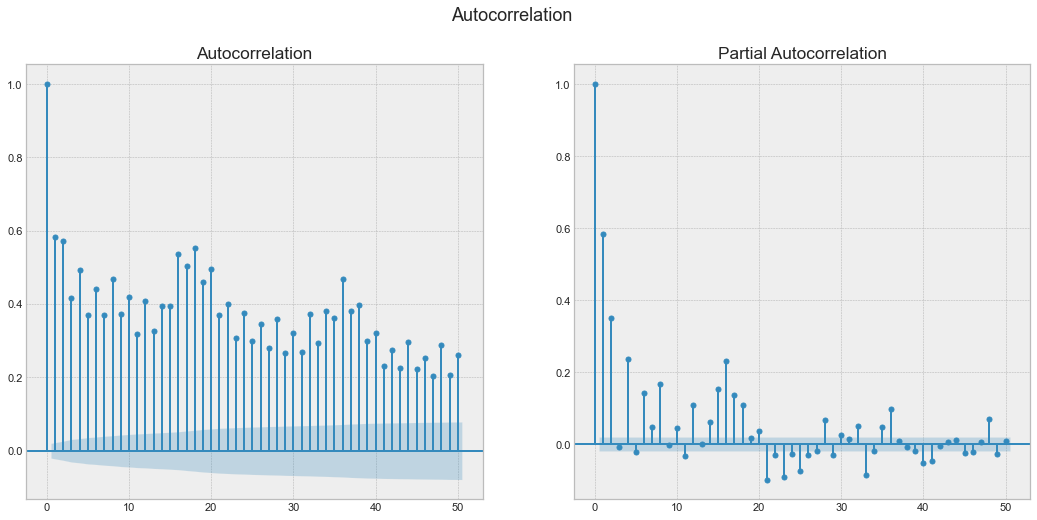

In [43]:
autocorr_analysis(df_graph['item_id'])

Text(0.5, 1.0, 'Item_id # over Time by order starts_at')

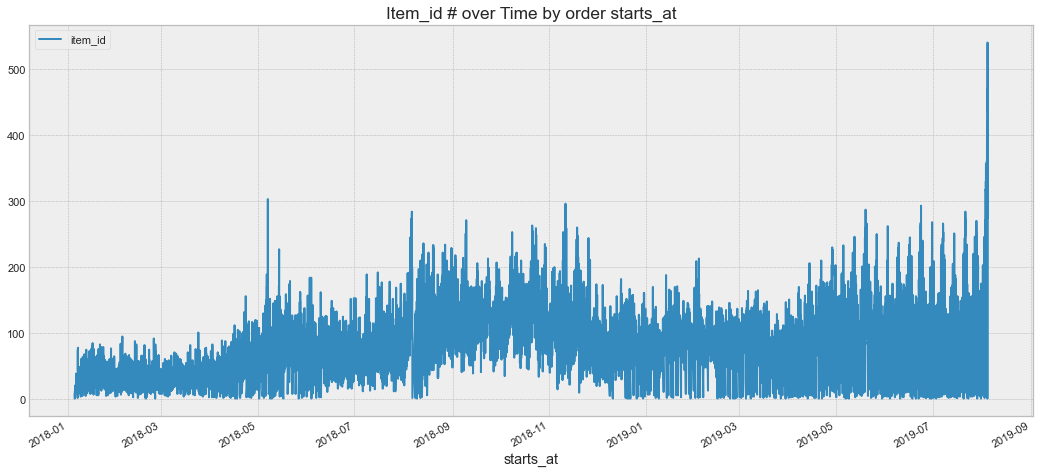

In [44]:
df_graph = relationships_df.groupby('starts_at')['item_id'].count().to_frame()
df_graph['item_id'].plot(figsize=(18,8), legend=True)
plt.title('Item_id # over Time by order starts_at')

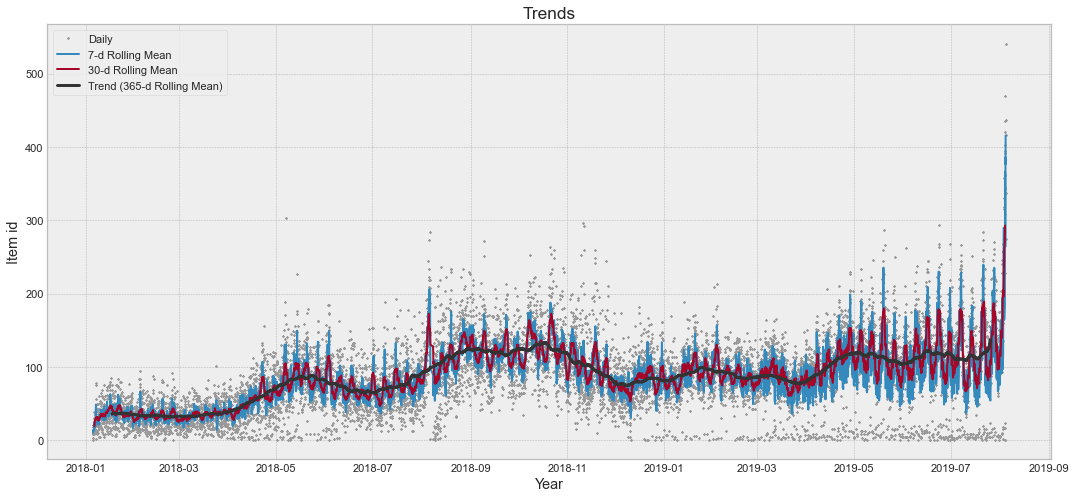

In [45]:
trend_analysis(df_graph['item_id'])

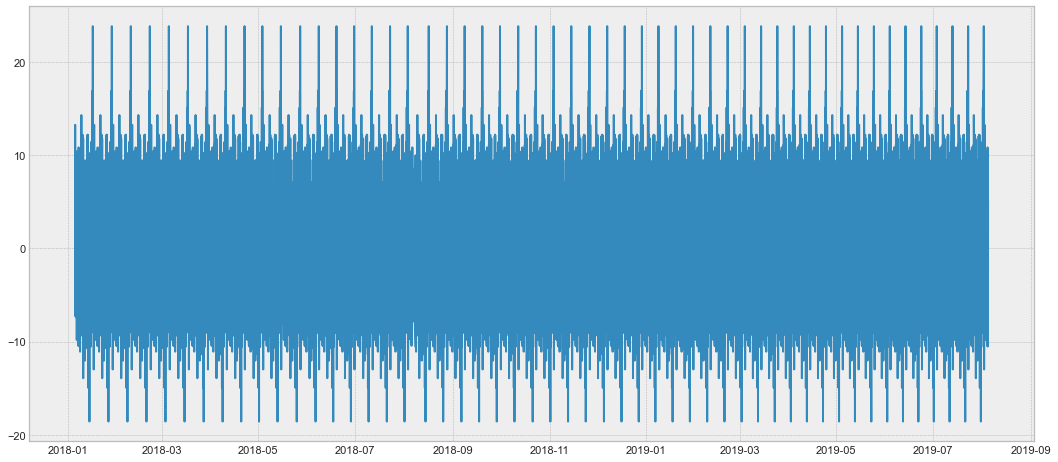

In [46]:
seasonality_analysis(df_graph['item_id'])

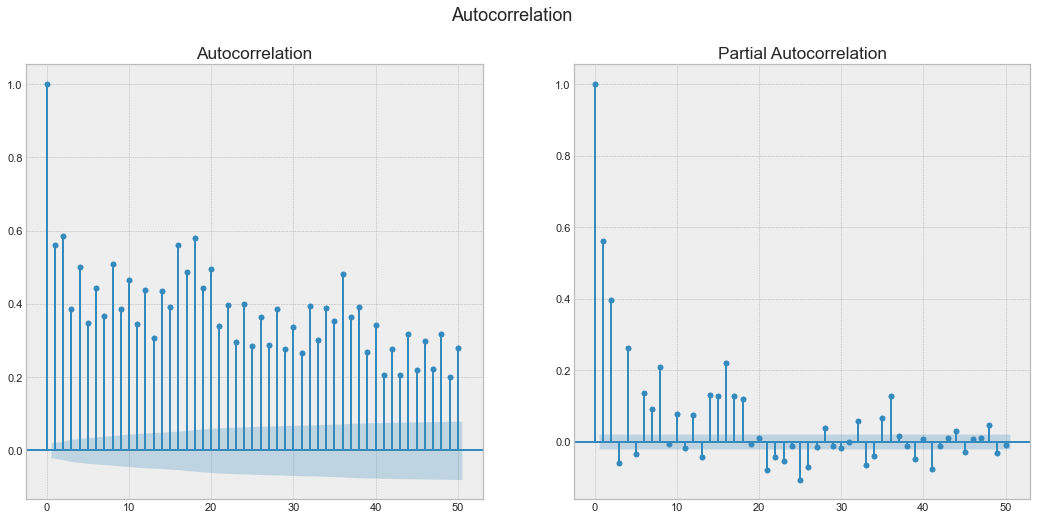

In [47]:
autocorr_analysis(df_graph['item_id'])

Анализ рядов  item_id к starts_at и item_id к ends_at, что данные ряды не стационарны и имеют тренды, а так же сезонные колебания.  

С точки зрения решения поставленной задачи, наибольший интерес представляет анализ 30 дневного скользящего среднего по проблемным товарам и слотам начал и конца доставки. Т.к. зная подобные колебания и группы товаров относящихся к проблемному процессу мы можем  сделать модель по предсказанию уровня запасов на складе в каждый конкретный месяц с детализации по неделям. 



## SECTION 5.2 CONCLUSIONS

- Набор данных hassle_free_orders отражает параметры нормально работающего процесса.
- Набор данных problematic_orders отражает параметры проблем в процессе
- Задача: Исследовать проблемы в процессе

- В целом анализ гистограмм распределения показывает, что распределение данных в значительной степени отличается от нормального и имеют хвосты.
- В наборе hassle_free_orders все заказы имеют статус «shipped».
- 94.7% заказов приходится на европейский часовой пояс, город Москва
- Распределение данных в значительной степени отличается от нормального и имеют хвосты.
- Диаграмма рассеянья заказов (order_id) и товаров, которые были отменены / заменены (item_id) показывает, что в целом товары данной категории образуют группу и значительное количество выбросов. Т.е. если минимизировать нарушения в процессе основной группы – это может повысить качества процесса оставив только относительно редкие события образующие выбросы.
- 60.7 % проблемный заказов отменяются, 39.3% заменяются. Такое соотношение крайне негативно сказывается на бизнесе.

- Имеется значительное количество выбросов превышающих интерквантильный размах

- Анализ географических данных показывает, что имеется 7 областей в которых осуществляются продажи при этом анализ временных зон показывает, что продажи ведутся в 5 городах(Москва, Самара, Екатеринбург, Омск, Калининград). Каждый город имеет разный объем продаж, что выделено соответствующим цветом.
- Продажи в меньших областях продажи происходят в магазинах с одним и тем же store_id, что позволяет из отнести к Самаре, Екатеринбургу, Омску Калининграду. В крупной области продажи происходят в разных магазинах, что позволяет предположить, что это Москва.
- Анализ географических данных по retailer_id основная часть магазинов принадлежит одному ретейлеру.

- Корреляционный анализ показывает, что между различным id есть сильная линейная связь, так же есть сильная линейная зависимость между весом заказа и его стоимостью. В целом для будущего построения моделей машинного обучения это означает, что от id можно и нужно избавиться для уменьшения размерности данных.
- Анализ временного ряда item_id ко времени created_at показывает, что тренды в данном временном ряду отсутствуют т.е. он по большому счету стационарен.
- Сезонности за период 180 дней не наблюдается. Автокорреляции нет.
- Аналогичные выводы относятся к ряду item_id ко времени shipped_at.
- Анализ рядов item_id к starts_at и item_id к ends_at, что данные ряды не стационарны и имеют тренды, а так же сезонные колебания.
- С точки зрения решения поставленной задачи, наибольший интерес представляет анализ 30 дневного скользящего среднего по проблемным товарам и слотам начал и конца доставки. Т.к. зная подобные колебания и группы товаров относящихся к проблемному процессу мы можем сделать модель по предсказанию уровня запасов на складе в каждый конкретный месяц с детализации по неделям.